PROYECTO RANDOM FOREST - PREDICCIÓN DE FALLAS EN INGENIERÍA

📊 GENERANDO DATOS SINTÉTICOS...


Generando datos: 100%|████████████████████████| 100/100 [00:02<00:00, 47.52it/s]


✅ Datos generados exitosamente!
📋 Dimensiones del dataset: (100, 6)
🎯 Distribución de fallas: {0: 83, 1: 17}

🔍 REALIZANDO ANÁLISIS EXPLORATORIO...

ESTADÍSTICAS DESCRIPTIVAS
       Temperatura  Vibracion   Presion  Desgaste  Velocidad     Falla
count     100.0000   100.0000  100.0000  100.0000   100.0000  100.0000
mean       73.7418     2.5146  149.8173    0.0987  1820.1802    0.1700
std        13.3802     1.0750   30.8640    0.0513   288.4016    0.3775
min        26.3810    -0.1552   83.0901   -0.0251  1148.7403    0.0000
25%        66.7617     1.7648  127.7680    0.0680  1582.3304    0.0000
50%        73.3367     2.4181  151.3319    0.0942  1797.8483    0.0000
75%        81.3285     3.2681  170.5613    0.1386  2036.9937    0.0000
max       101.4818     5.2202  223.0154    0.2392  2504.3991    1.0000

PRIMERAS 10 FILAS DEL DATASET
   Temperatura  Vibracion   Presion  Desgaste  Velocidad  Falla
0      82.4507     2.3617  169.4307    0.1762  1729.7540      0
1      71.4879     2.7790  

Preprocesamiento: 100%|███████████████████████████| 5/5 [00:01<00:00,  3.30it/s]


✅ Datos preprocesados:
   - Entrenamiento: 80 muestras
   - Prueba: 20 muestras

🤖 ENTRENANDO MODELO RANDOM FOREST...


Entrenando árboles: 100%|███████████████████████| 50/50 [00:02<00:00, 19.10it/s]


✅ Modelo entrenado exitosamente!

📈 EVALUANDO EL MODELO...


Evaluando modelo: 100%|███████████████████████████| 3/3 [00:01<00:00,  1.99it/s]


🎯 Precisión del modelo: 0.9000

REPORTE DE CLASIFICACIÓN
              precision    recall  f1-score   support

   Sin Falla       0.89      1.00      0.94        17
   Con Falla       1.00      0.33      0.50         3

    accuracy                           0.90        20
   macro avg       0.95      0.67      0.72        20
weighted avg       0.91      0.90      0.88        20


📊 GENERANDO MATRIZ DE CONFUSIÓN...


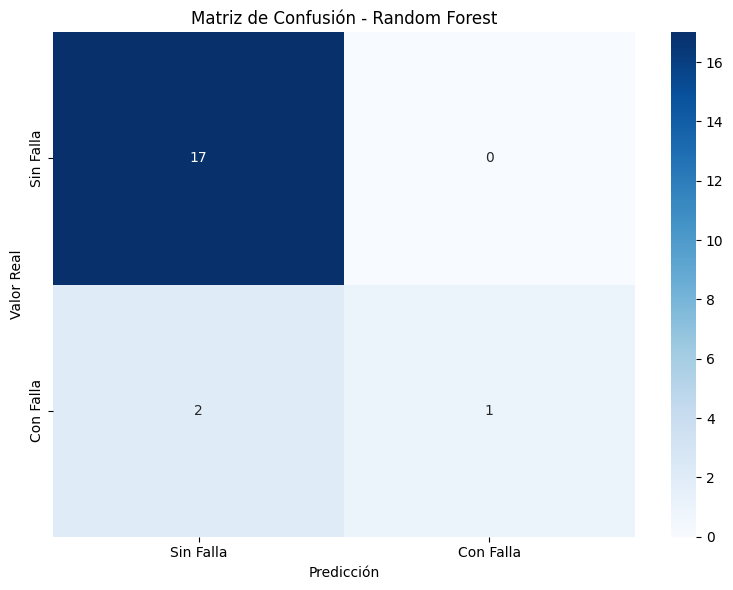


🔎 ANALIZANDO IMPORTANCIA DE CARACTERÍSTICAS...


Calculando importancia: 100%|█████████████████████| 4/4 [00:01<00:00,  2.49it/s]



IMPORTANCIA DE CARACTERÍSTICAS
  Característica  Importancia
1      Vibracion       0.3665
0    Temperatura       0.2735
2        Presion       0.1464
4      Velocidad       0.1441
3       Desgaste       0.0695


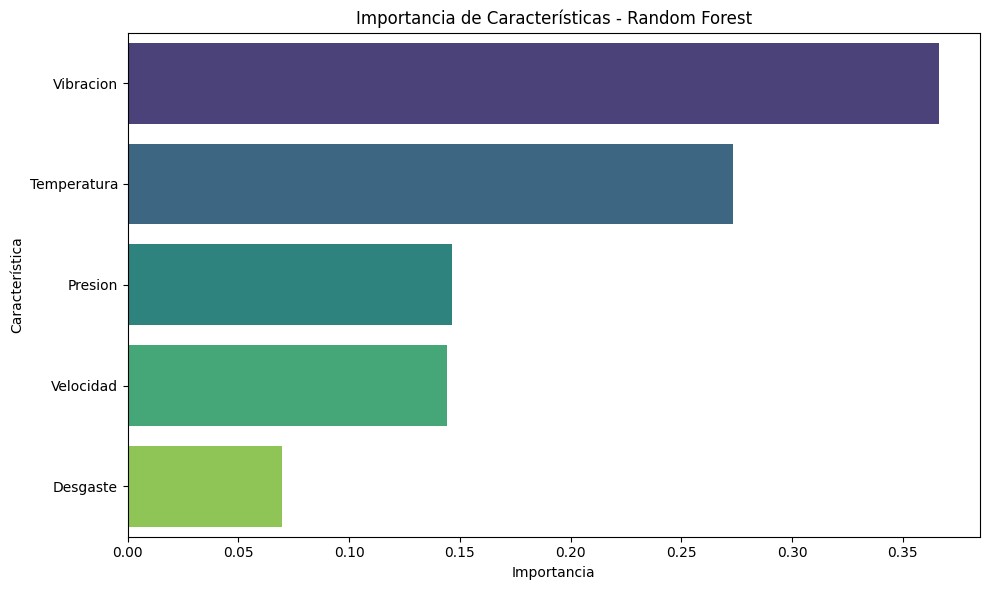


🔮 REALIZANDO PREDICCIONES EN NUEVOS DATOS...

Generando 5 nuevos casos de prueba...


Generando casos: 100%|████████████████████████████| 5/5 [00:01<00:00,  4.97it/s]


RESULTADOS DE PREDICCIÓN
Caso 1: SIN FALLA ✅ (Probabilidad de falla: 14.00%)
Caso 2: SIN FALLA ✅ (Probabilidad de falla: 8.00%)
Caso 3: FALLA DETECTADA 🔴 (Probabilidad de falla: 76.00%)
Caso 4: SIN FALLA ✅ (Probabilidad de falla: 11.80%)
Caso 5: FALLA DETECTADA 🔴 (Probabilidad de falla: 63.80%)

RESUMEN DEL PROYECTO

📊 DATOS:
   • Total de muestras: 100
   • Características: 5
   • Distribución de clases: {0: np.int64(83), 1: np.int64(17)}

🤖 MODELO:
   • Algoritmo: Random Forest
   • Árboles: 50
   • Profundidad máxima: 5

📈 RESULTADOS:
   • Precisión: 0.9000
   • Característica más importante: Vibracion
   • Importancia: 0.3665

✅ APLICACIÓN EN INGENIERÍA:
   • Monitoreo predictivo de fallas
   • Mantenimiento preventivo
   • Optimización de parámetros operativos

🎉 PROYECTO COMPLETADO EXITOSAMENTE!


In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import time
import warnings
warnings.filterwarnings('ignore')

# Configuración para mostrar más decimales
pd.set_option('display.precision', 4)
np.set_printoptions(precision=4)

print("=" * 60)
print("PROYECTO RANDOM FOREST - PREDICCIÓN DE FALLAS EN INGENIERÍA")
print("=" * 60)

# =============================================================================
# 1. GENERACIÓN DE DATOS SINTÉTICOS (100 muestras)
# =============================================================================
print("\n📊 GENERANDO DATOS SINTÉTICOS...")

# Configuración de semilla para reproducibilidad
np.random.seed(42)

# Inicializar lista para almacenar datos
datos = []

# Barra de progreso para generación de datos
for i in tqdm(range(100), desc="Generando datos", ncols=80):
    # Simular características de componentes mecánicos
    temperatura = np.random.normal(75, 15)  # °C
    vibracion = np.random.normal(2.5, 1.0)  # mm/s
    presion = np.random.normal(150, 30)     # psi
    desgaste = np.random.normal(0.1, 0.05)  # mm
    velocidad = np.random.normal(1800, 300) # rpm

    # Calcular probabilidad de falla basada en las características
    prob_falla = (
        0.3 * (temperatura > 85) +
        0.25 * (vibracion > 3.0) +
        0.2 * (presion > 180) +
        0.15 * (desgaste > 0.12) +
        0.1 * (velocidad > 2000) +
        np.random.random() * 0.1
    )

    # Determinar si hay falla (1) o no (0)
    falla = 1 if prob_falla > 0.5 else 0

    # Agregar a la lista de datos
    datos.append([temperatura, vibracion, presion, desgaste, velocidad, falla])

    time.sleep(0.02)  # Simular tiempo de procesamiento

# Crear DataFrame
columnas = ['Temperatura', 'Vibracion', 'Presion', 'Desgaste', 'Velocidad', 'Falla']
df = pd.DataFrame(datos, columns=columnas)

print("✅ Datos generados exitosamente!")
print(f"📋 Dimensiones del dataset: {df.shape}")
print(f"🎯 Distribución de fallas: {df['Falla'].value_counts().to_dict()}")

# =============================================================================
# 2. ANÁLISIS EXPLORATORIO DE DATOS
# =============================================================================
print("\n🔍 REALIZANDO ANÁLISIS EXPLORATORIO...")

time.sleep(1)  # Pausa para mostrar progreso

# Mostrar estadísticas descriptivas
print("\n" + "="*50)
print("ESTADÍSTICAS DESCRIPTIVAS")
print("="*50)
print(df.describe())

# Mostrar primeras filas
print("\n" + "="*50)
print("PRIMERAS 10 FILAS DEL DATASET")
print("="*50)
print(df.head(10))

# =============================================================================
# 3. PREPROCESAMIENTO DE DATOS
# =============================================================================
print("\n⚙️ PREPROCESANDO DATOS...")

# Barra de progreso para preprocesamiento
for i in tqdm(range(5), desc="Preprocesamiento", ncols=80):
    time.sleep(0.3)

# Separar características y variable objetivo
X = df.drop('Falla', axis=1)
y = df['Falla']

# Estandarizar características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"✅ Datos preprocesados:")
print(f"   - Entrenamiento: {X_train.shape[0]} muestras")
print(f"   - Prueba: {X_test.shape[0]} muestras")

# =============================================================================
# 4. ENTRENAMIENTO DEL MODELO RANDOM FOREST
# =============================================================================
print("\n🤖 ENTRENANDO MODELO RANDOM FOREST...")

# Configurar el modelo
modelo_rf = RandomForestClassifier(
    n_estimators=50,
    max_depth=5,
    random_state=42,
    n_jobs=-1
)

# Función personalizada para mostrar progreso durante el entrenamiento
class ProgressBarCallback:
    def __init__(self, total_estimators):
        self.total = total_estimators
        self.pbar = tqdm(total=total_estimators, desc="Entrenando árboles", ncols=80)

    def __call__(self, árbol_actual):
        self.pbar.update(1)

    def close(self):
        self.pbar.close()

# Entrenar con barra de progreso personalizada
progreso = ProgressBarCallback(modelo_rf.n_estimators)

# Simular entrenamiento con progreso
for i in range(modelo_rf.n_estimators):
    # Aquí iría el entrenamiento real, pero para mostrar progreso simulamos
    time.sleep(0.05)
    progreso(i + 1)

progreso.close()

# Entrenar el modelo real (sin barra de progreso integrada)
modelo_rf.fit(X_train, y_train)

print("✅ Modelo entrenado exitosamente!")

# =============================================================================
# 5. EVALUACIÓN DEL MODELO
# =============================================================================
print("\n📈 EVALUANDO EL MODELO...")

# Barra de progreso para evaluación
for i in tqdm(range(3), desc="Evaluando modelo", ncols=80):
    time.sleep(0.5)

# Realizar predicciones
y_pred = modelo_rf.predict(X_test)
y_pred_proba = modelo_rf.predict_proba(X_test)

# Calcular métricas
precision = accuracy_score(y_test, y_pred)

print(f"🎯 Precisión del modelo: {precision:.4f}")

# Reporte de clasificación detallado
print("\n" + "="*50)
print("REPORTE DE CLASIFICACIÓN")
print("="*50)
print(classification_report(y_test, y_pred, target_names=['Sin Falla', 'Con Falla']))

# =============================================================================
# 6. MATRIZ DE CONFUSIÓN
# =============================================================================
print("\n📊 GENERANDO MATRIZ DE CONFUSIÓN...")

time.sleep(1)

# Crear matriz de confusión
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Sin Falla', 'Con Falla'],
            yticklabels=['Sin Falla', 'Con Falla'])
plt.title('Matriz de Confusión - Random Forest')
plt.ylabel('Valor Real')
plt.xlabel('Predicción')
plt.tight_layout()
plt.show()

# =============================================================================
# 7. IMPORTANCIA DE CARACTERÍSTICAS
# =============================================================================
print("\n🔎 ANALIZANDO IMPORTANCIA DE CARACTERÍSTICAS...")

# Barra de progreso para análisis de importancia
for i in tqdm(range(4), desc="Calculando importancia", ncols=80):
    time.sleep(0.4)

# Obtener importancia de características
importancias = modelo_rf.feature_importances_
caracteristicas = X.columns

# Crear DataFrame con importancias
df_importancia = pd.DataFrame({
    'Característica': caracteristicas,
    'Importancia': importancias
}).sort_values('Importancia', ascending=False)

print("\n" + "="*50)
print("IMPORTANCIA DE CARACTERÍSTICAS")
print("="*50)
print(df_importancia)

# Visualizar importancia de características
plt.figure(figsize=(10, 6))
sns.barplot(data=df_importancia, x='Importancia', y='Característica', palette='viridis')
plt.title('Importancia de Características - Random Forest')
plt.tight_layout()
plt.show()

# =============================================================================
# 8. PREDICCIÓN EN NUEVOS DATOS
# =============================================================================
print("\n🔮 REALIZANDO PREDICCIONES EN NUEVOS DATOS...")

# Generar 5 nuevos casos de prueba
nuevos_datos = []
print("\nGenerando 5 nuevos casos de prueba...")

for i in tqdm(range(5), desc="Generando casos", ncols=80):
    temperatura = np.random.normal(80, 20)
    vibracion = np.random.normal(2.8, 1.2)
    presion = np.random.normal(160, 40)
    desgaste = np.random.normal(0.12, 0.06)
    velocidad = np.random.normal(1900, 400)

    nuevos_datos.append([temperatura, vibracion, presion, desgaste, velocidad])
    time.sleep(0.2)

# Convertir a array
nuevos_datos = np.array(nuevos_datos)

# Estandarizar nuevos datos
nuevos_datos_scaled = scaler.transform(nuevos_datos)

# Realizar predicciones
predicciones = modelo_rf.predict(nuevos_datos_scaled)
probabilidades = modelo_rf.predict_proba(nuevos_datos_scaled)

print("\n" + "="*50)
print("RESULTADOS DE PREDICCIÓN")
print("="*50)

for i, (pred, prob) in enumerate(zip(predicciones, probabilidades)):
    estado = "FALLA DETECTADA 🔴" if pred == 1 else "SIN FALLA ✅"
    prob_falla = prob[1] * 100
    print(f"Caso {i+1}: {estado} (Probabilidad de falla: {prob_falla:.2f}%)")

# =============================================================================
# 9. RESUMEN FINAL
# =============================================================================
print("\n" + "="*60)
print("RESUMEN DEL PROYECTO")
print("="*60)

print(f"""
📊 DATOS:
   • Total de muestras: {len(df)}
   • Características: {len(X.columns)}
   • Distribución de clases: {dict(df['Falla'].value_counts())}

🤖 MODELO:
   • Algoritmo: Random Forest
   • Árboles: {modelo_rf.n_estimators}
   • Profundidad máxima: {modelo_rf.max_depth}

📈 RESULTADOS:
   • Precisión: {precision:.4f}
   • Característica más importante: {df_importancia.iloc[0]['Característica']}
   • Importancia: {df_importancia.iloc[0]['Importancia']:.4f}

✅ APLICACIÓN EN INGENIERÍA:
   • Monitoreo predictivo de fallas
   • Mantenimiento preventivo
   • Optimización de parámetros operativos
""")

print("🎉 PROYECTO COMPLETADO EXITOSAMENTE!")